In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load data

In [2]:
file_url = "https://raw.githubusercontent.com/dths8/DSA4263_Vehicle-Insurance-Fraud-Detection/refs/heads/main/data/insurance_claims.csv"

df = pd.read_csv(file_url)

display(df)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Data cleaning

_c39                           1000
authorities_contacted            91
fraud_reported                    0
auto_year                         0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
dtype: int64
months_as_customer             0
witnesses                      0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
police_report_available        0
dtype: int64

policy_state:
['OH' 'IN' 'IL']

insured_occupation:
['Manual' 'Sales/Service' 'Technical' 'Professional']

insured_hobbies:
['Leisure' 'Games' 'Extreme' 'Sports' 'Outdoor']

insured_relationship:
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_t

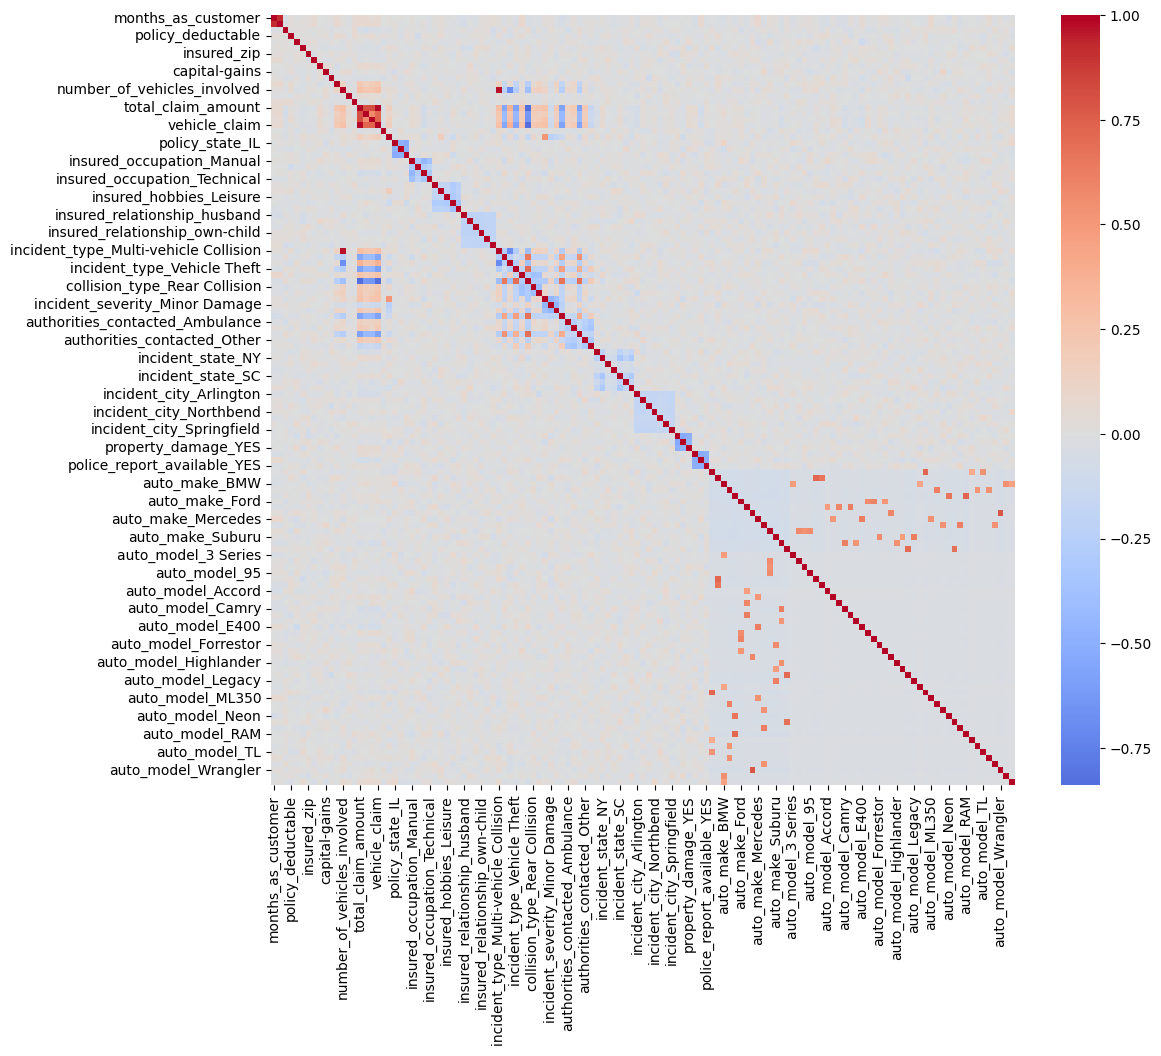

Highly correlated feature pairs:
                         Feature1                               Feature2  \
1817           total_claim_amount                          vehicle_claim   
1496  number_of_vehicles_involved  incident_type_Multi-vehicle Collision   
0              months_as_customer                                    age   

      Correlation  
1817     0.982773  
1496     0.970146  
0        0.922098  


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,capital-gains,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1,1000,1406.91,0,466132,1,4,53300,...,False,False,False,False,False,False,False,False,False,False
1,228,42,1,2000,1197.22,5000000,468176,1,4,0,...,False,False,False,False,False,False,False,False,False,False
2,134,29,0,2000,1413.14,5000000,430632,0,6,35100,...,False,True,False,False,False,False,False,False,False,False
3,256,41,1,2000,1415.74,6000000,608117,0,6,48900,...,False,False,False,False,False,True,False,False,False,False
4,228,44,2,1000,1583.91,6000000,610706,1,0,66000,...,False,False,True,False,False,False,False,False,False,False


In [3]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

#remove c39 & policy num col, redundant column
df = df.drop('_c39', axis=1)
df = df.drop('policy_number', axis=1)



# take missing values as authorities not contacted
df['authorities_contacted'] = df['authorities_contacted'].fillna('None')
print(df.isnull().sum().sort_values(ascending=False).head(10))

# encode target var
df['fraud_reported'].unique()
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})




#cols not to be encoded
columns_to_drop = ['policy_bind_date', 'incident_date', 'incident_location']
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)


date_columns = ['policy_bind_date', 'incident_date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_dayofweek'] = df[col].dt.dayofweek
        print(f"Converted {col} to datetime features")
        df = df.drop(col, axis=1)


df.replace('?', pd.NA, inplace=True)



#create binning for occupation and hobbies to reduce cols
occupation_mapping = {
    'craft-repair': 'Manual',
    'machine-op-inspct': 'Manual',
    'handlers-cleaners': 'Manual',
    'transport-moving': 'Manual',
    'farming-fishing': 'Manual',
    
    'sales': 'Sales/Service',
    'adm-clerical': 'Sales/Service',
    'other-service': 'Sales/Service',
    'priv-house-serv': 'Sales/Service',
    
    'exec-managerial': 'Professional',
    'prof-specialty': 'Professional',
    
    'tech-support': 'Technical',
    'protective-serv': 'Technical',
    'armed-forces': 'Technical'
}

df['insured_occupation'] = df['insured_occupation'].map(occupation_mapping)



hobbies_mapping = {
    'sleeping': 'Leisure',
    'reading': 'Leisure',
    'movies': 'Leisure',
    
    'board-games': 'Games',
    'chess': 'Games',
    'video-games': 'Games',
    
    'bungie-jumping': 'Extreme',
    'base-jumping': 'Extreme',
    'skydiving': 'Extreme',
    
    'golf': 'Sports',
    'basketball': 'Sports',
    'polo': 'Sports',
    'cross-fit': 'Sports',
    'exercise': 'Sports',
    
    'camping': 'Outdoor',
    'hiking': 'Outdoor',
    'yachting': 'Outdoor',
    'paintball': 'Outdoor',
    'kayaking': 'Outdoor',
    'dancing': 'Outdoor'
}

df['insured_hobbies'] = df['insured_hobbies'].map(hobbies_mapping)


#cols to be one-hot encoded
one_hot_features = ['policy_state', 'insured_occupation', 'insured_hobbies',
                    'insured_relationship','incident_type', 'collision_type',
                    'incident_severity', 'authorities_contacted', 'incident_state',
                    'incident_city', 'property_damage', 'police_report_available',
                    'auto_make', 'auto_model']

#cols to be label encoded
label_encode_features = ['policy_csl', 'insured_sex', 'insured_education_level']

# fill missing
df[one_hot_features] = df[one_hot_features].fillna('Missing')
df[label_encode_features] = df[label_encode_features].fillna('Missing')


#for sanity check of encoding cols
for col in one_hot_features + label_encode_features:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].unique())



# one-hot encode
df = pd.get_dummies(df, columns=one_hot_features, drop_first=False)

#label encode
label_mappings = {}
for col in label_encode_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    mapping = {k: int(v) for k, v in zip(le.classes_, le.transform(le.classes_))}
    label_mappings[col] = mapping
    print(f"Label mapping for {col}: {mapping}\n")

# check if encoding is correct
print(df.columns.tolist())


#check for dupes
print("Duplicate rows:", df.duplicated().sum())




corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()


corr_matrix = df.corr().abs()

# upper triangle only 
upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_pairs = pd.DataFrame(
    [(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.values[i,j])
     for i in range(corr_matrix.shape[0])
     for j in range(corr_matrix.shape[1])
     if upper[i,j]],
    columns=['Feature1', 'Feature2', 'Correlation']
)

#filter pairs with corr above threshold 0.85
high_corr_pairs = corr_pairs[corr_pairs['Correlation'] > 0.85].sort_values(by='Correlation', ascending=False)

print("Highly correlated feature pairs:")
print(high_corr_pairs)


df = df.drop(['vehicle_claim', 'incident_type_Multi-vehicle Collision'], axis=1)

df.head()



In [4]:
#scale numeric var
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# exclude target and label encoded cols
exclude_cols = ['fraud_reported'] + label_encode_features + [
    'policy_bind_date_year', 'policy_bind_date_month', 'policy_bind_date_day', 'policy_bind_date_dayofweek',
    'incident_date_year', 'incident_date_month', 'incident_date_day', 'incident_date_dayofweek',
    'incident_hour_of_the_day'
]
numeric_features_to_scale = [col for col in numeric_features if col not in exclude_cols]

scaler = StandardScaler()
df[numeric_features_to_scale] = scaler.fit_transform(df[numeric_features_to_scale])

pd.set_option('display.max_columns', None)

print(df.isnull().sum().sum()) #should get 0

df.head()

0


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_year,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,insured_occupation_Manual,insured_occupation_Professional,insured_occupation_Sales/Service,insured_occupation_Technical,insured_hobbies_Extreme,insured_hobbies_Games,insured_hobbies_Leisure,insured_hobbies_Outdoor,insured_hobbies_Sports,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Missing,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_Missing,property_damage_NO,property_damage_YES,police_report_available_Missing,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1.078140,0.990836,1,-0.222383,0.616705,-0.479476,-0.489529,1,4,1.011331,0.953851,5,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,-0.183440,1,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.208995,0.334073,1,1.412784,-0.242521,1.697980,-0.461008,1,4,-0.901927,0.953851,8,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,0.315491,1,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa